In [1]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 as cv
# import multiprocessing as mp
import random

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'br') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

## getting CIFAR-10 dataset

    batches is a Python list that holds dictionaries:
   
        batches[0][b'data] returns 10,000 horizontalized images from batch_1
        batches[0][b'data][0] is the 1st image in the dataset

In [3]:
path = os.getcwd() + "\\cifar-10-batches-py\\"
batches = []

for i in range(5): #getting path + name of the folder for the dataset
    file = path + "data_batch_" + str(i+1)
    batches.append(unpickle( file ))

In [16]:
#returns a uint8 numpy array with m x n x color(R,G,o B)
def from_array_to_RGB(I_lin, channel_dim=1024):
    L = channel_dim
    side = int(np.sqrt(L)) #square image
    
    I = np.zeros((side,side,3), dtype=np.uint8)
    #==== color channels
    #R
    I[:,:,0] = I_lin[0:L].reshape((side,side)) 
    #G
    I[:,:,1] = I_lin[L:2*L].reshape((side,side))
    #B
    I[:,:,2] = I_lin[2*L:3*L].reshape((side,side))
    return I

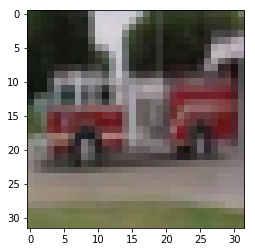

In [24]:
selection = random.sample(range(batches[0][b'data'].shape[0]), 1)

I_lin = batches[0][b'data'][selection[0]][:]
plt.imshow(from_array_to_RGB(I_lin))